In [1]:
## Excercise 3 | Part 2: Neural Networks

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from scipy.io import loadmat

In [2]:
## Setup the parameters you will use for this part of the exercise
input_layer_size = 400  # 20x20 Input Images of Digit
num_labels = 10         # 10 labels, from 1 to 10
                        # (note that we have mapped "0" to label 10)

In [3]:
## Part 1: Loading and Visualizing Data

def displayData(X, width=None):    
    if X.ndim == 1:
        X = X.reshape(1, -1)
        
    # Set width automatically if not passed in
    if not width:
        width = round(X.shape[1]**0.5)
        
    # Gray Image
    plt.set_cmap('gray')
    
    # Compute rows, cols
    m, n = X.shape
    height = int(n / width)
    
    # Compute number of items to display
    disp_rows = int(m**0.5)
    disp_cols = int(np.ceil(m / disp_rows))
    
    # Between images padding
    pad = 1
    
    # Setup blank display
    disp_arr = -np.ones((pad + disp_rows * (height + pad), 
                         pad + disp_cols * (width + pad)))
    
    # Copy each example into a patch on the display array
    curr_ex = 0
    for j in range(disp_rows):
        for i in range(disp_cols):
            if curr_ex > (m - 1):
                break
            # Copy the patch
            
            # Get the max value of the patch
            max_val = max(abs(X[curr_ex]))
            
            r = pad + j * (height + pad)
            c = pad + i * (width + pad)
            
            disp_arr[r:r+height, c:c+width] = X[curr_ex].reshape(
                height, width, order='F') / max_val
            
            curr_ex += 1
        if curr_ex > (m - 1):
            break
    
    # Display Image
    h = plt.imshow(disp_arr)
    
    # Do not show axis
    plt.axis('off')
    
    return h, disp_arr

Loading and Visualizing Data ...


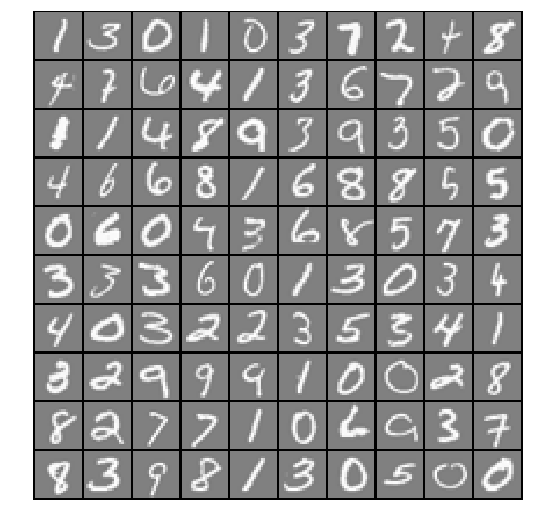

In [4]:
# Load Training Data
print('Loading and Visualizing Data ...')

data = loadmat('../ex3/ex3data1.mat')
X = data['X']
y = data['y'].ravel()
m = len(X)

# Randomly select 100 data points to display
sel = np.random.permutation(m)
sel = sel[:100]

plt.figure(figsize=(9, 9))
displayData(X[sel])
None

In [5]:
## Part 2: Loading Parameters

print('\nLoading Saved Neural Network Parameters ...')

# Load the weights into variabels Theta1 and Theta2
data = loadmat('../ex3/ex3weights.mat')
Theta1 = data['Theta1']
Theta2 = data['Theta2']


Loading Saved Neural Network Parameters ...


In [6]:
## Part 3: Implement Predict

def sigmoid(z):
    g = 1 / (1 + np.exp(-z))
    return g


def predict(Theta1, Theta2, X):
    if X.ndim == 1:
        X = X.reshape(1, -1)
        
    m = len(X)
    num_labels = len(Theta2)
    
    # Input Layer
    z_1 = X
    a_1 = np.c_[np.ones(m), z_1]
    
    # Hidden Layer
    z_2 = a_1.dot(Theta1.T)
    a_2 = np.c_[np.ones(m), sigmoid(z_2)]
    
    # Output Layer
    z_3 = a_2.dot(Theta2.T)
    a_3 = sigmoid(z_3)
    
    H = a_3
    
    p = np.argmax(H, axis=1)
    
    if m == 1:
        p = p.squeeze()
    
    return p + 1


Training Set Accuracy 97.5



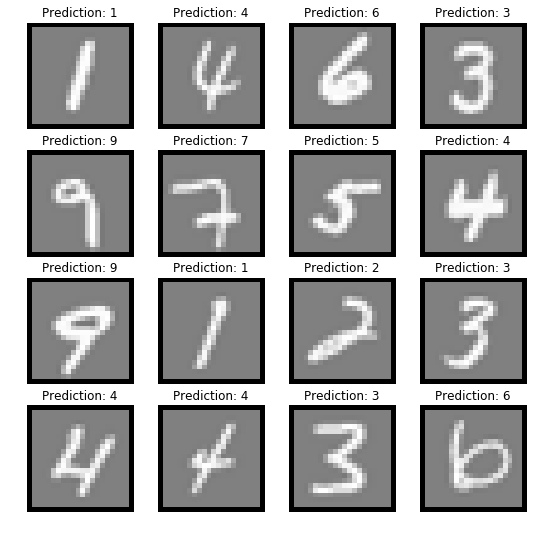

In [7]:
pred = predict(Theta1, Theta2, X)

print('\nTraining Set Accuracy {:.1f}\n'.format(np.mean(pred == y) * 100))

#  Randomly permute examples
rp = np.random.permutation(m)

fig = plt.figure(figsize=(9, 9))
for i in range(16):
    # Display Image
    fig.add_subplot(4, 4, i + 1)
    displayData(X[rp[i]])
    
    pred = predict(Theta1, Theta2, X[rp[i]])
    plt.title('Prediction: {:d}'.format(pred % num_labels))